#Author : Lahlou Benidiri#M2DS : Projet de deep learning

#Demarche suivie

#Partie (1):

##1)Choix de dataset: 
#3)Problématique: Predire à partir des données open source les souscriptions 
##des candidats à un produits marketing
#Partie (2):

##4)Construction d'un modele de type classifier sequentiel
##5)Evaluation du modele

#Partie (3):
##7)Mise en production du modele :Deploiement du modele avec Flask

##8) Docker

#Perspectives

#Partie (1): Exploration des données et construction du modele

In [58]:
#1) Importation des données d'entrées :

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [60]:
data = pd.read_csv('/content/bank-full_data.csv', delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [61]:
#data.describe(include="all")

#Pré-traitement des données
##Split Données categorielles
##Split Données numeriques
##Nettoyage et recodage 

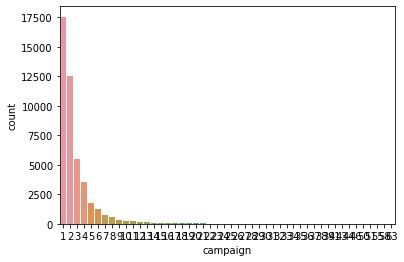

In [62]:
import seaborn as sns
sns.countplot(x='campaign', data=data)

Nous allons prendre la variable Y comme target dans notre travail.

In [63]:
y = data.y
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [64]:
data.drop('y', inplace=True, axis=1)

In [65]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


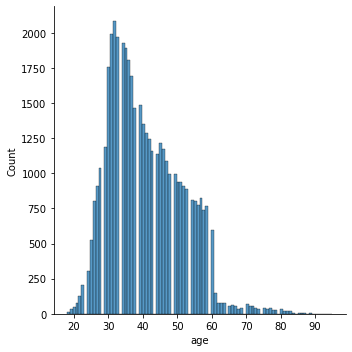

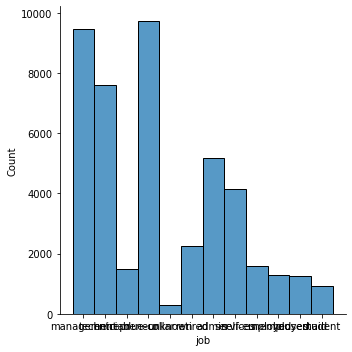

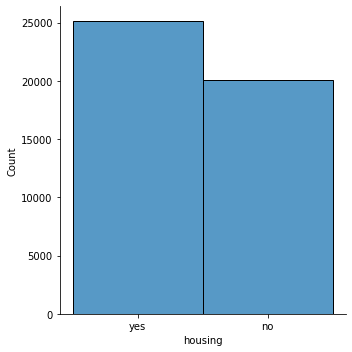

In [66]:
sns.displot(data.age), sns.displot(data.job)
sns.displot(data.housing)


In [67]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


La corrélation dans notre ensemble de données semble vraiment mauvaise. Heureusement, les caractéristiques catégorielles ne sont pas incluses ici. Elles pourraient également avoir un certain pouvoir prédictif ! Comment pouvons-nous les utiliser ? Let's go ===> 


In [68]:
data.isna().sum() #Aucune valeure manquante.


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#Separation des données

In [69]:
cat_data = []
num_data = []

for i,c in enumerate(data.dtypes):
  if c == object:
    cat_data.append(data.iloc[:,i])
  else:
    num_data.append(data.iloc[:,i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [70]:
cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [71]:
num_data

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


#Onehot encoding: apply to categorical data

In [72]:
cat_data = pd.get_dummies(cat_data)
cat_data

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#Target:recodage

In [73]:
y_values = {"yes":1,"no":0}
y= y.map(y_values )
y


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

#Données numeriques:

In [74]:
num_data


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


#Concatenation

In [75]:
#cat_data

In [76]:
data_final = pd.concat([num_data, cat_data], axis = 1)

In [77]:
data_final.shape

(45211, 51)

#Analyse des données:
##CONCLUSION SUR LES CLIENTS DES BANQUES
Les âges ne signifient pas grand chose, ils ont une dispersion moyenne et n'ont pas de sens si on les met en relation avec d'autres variables, cela ne donnera aucune indication.

L'emploi, l'état civil et l'éducation, je pense que la meilleure analyse est juste le nombre de chaque variable, si nous les relions avec les autres, ce n'est pas concluant, tous ces types de variables ont oui, inconnu et non pour le prêt, le défaut et le logement.

Défaut, prêt et logement, c'est juste pour voir la distribution des gens.



#Standariser les données

In [78]:
# Normaliser X_train
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_Train_scaled = sc.fit_transform(data_final)
X_Train_scaled

array([[0.51948052, 0.09225936, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.07306666, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.07282153, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.12468905, 0.53333333, ..., 0.        , 1.        ,
        0.        ],
       [0.50649351, 0.07886805, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.09977666, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

#Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, x_val, Y_train, y_val = train_test_split(X_Train_scaled, y, test_size = 0.2, random_state = 101)

In [80]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [81]:
#y_train
X_train.shape, Y_train.shape

((36168, 51), (36168,))

In [82]:
type(X_train)

numpy.ndarray

#Modele

In [83]:
#importations des modules 
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
import h5py
from keras.models import load_model

In [84]:
data.shape, X_train.shape, Y_train.shape

((45211, 16), (36168, 51), (36168,))

In [85]:
#initialisation du modèle
classifier=Sequential()
#Ajouter de la couche d'entrée et cachée

classifier.add(Dense(units=25,activation ="relu", kernel_initializer ="uniform",input_dim=51))
classifier.add(Dropout(rate=0.1))

#Ajouter des couches cachées
classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))


classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

classifier.add(Dense(units=25,activation="relu",kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.1))

#Ajouter de la couche de sortie
classifier.add(Dense(units=1, activation ="sigmoid",kernel_initializer="uniform"))

#Entrainnement & Evaluation du modele

In [86]:
#Compilation du réseau de neurones
#  classifier.compile(optimizer="adam",loss="binary_crossentropy", metrics=['binary_accuracy'])
# compile
classifier.compile(loss='binary_crossentropy',
            optimizer="Adam",
            metrics=['binary_accuracy'])

In [87]:
X_train.shape

(36168, 51)

In [88]:
#story = classifier.fit(X_train,Y_train,batch_size=10,validation_split = 0.2, epochs=100,validation_data=(x_val, y_val), shuffle=True)

In [89]:
#Entrainer le réseau de neurones
#story = classifier.fit(X_train,Y_train,batch_size=10,validation_split = 0.2, epochs=100,validation_data=(x_val, y_val), shuffle=True)

In [90]:
import tensorflow as tf

In [91]:
# model = tf.keras.models.load_model('my_model') # transform en keras format
# model

In [92]:
#Nous avons obtenu loss: 0.1882 et score de 91%

#On a deja evalué le modele précididement, ci-dessous une autres methode:
# def evaluate(classifier, x_val, y_val):
#     predicted = classifier.predict(x_val)
#     return predicted

# evaluate(classifier, x_val, y_val)

In [ ]:
# reconstructed_model = keras.models.load_model('my_model')
# reconstructed_model

In [103]:
out_of_sample_predictions = classifier.predict(x_val)
out_of_sample_predictions

array([[0.50000167],
       [0.5000009 ],
       [0.50000465],
       ...,
       [0.5000018 ],
       [0.5000028 ],
       [0.50000155]], dtype=float32)

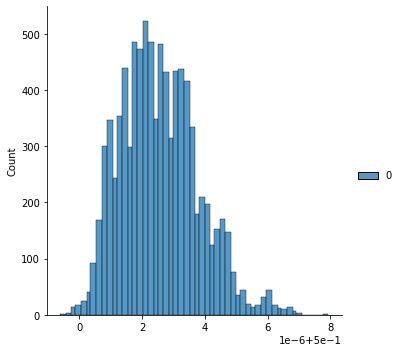

In [104]:
import seaborn as sns
sns.displot(out_of_sample_predictions)


#Prediction: encodage des sorties 

In [94]:
#Prediction 
def predict(j):
    ZZ= []
    z = classifier.predict(x_val)
    z[j]
    # si z est supérieur à 0,5, notre prédiction est de signe un (y_head=1),
    # si z est inférieur à 0,5, notre prédiction est de signe zéro (y_head=0),
    if z[j] <= 0.5:
        z = 0
        ZZ.append(z)
    else:
        z = 1
        ZZ.append(z)
    return ZZ

In [ ]:
A = predict(1)  # test 
A

In [95]:
#Save modele 
classifier.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
# serialize weights to HDF5
#classifier.save_weights("model.h5")  # to deploy with flask


In [ ]:

reconstructed_model = keras.models.load_model('my_model')
reconstructed_model

In [98]:
classifier.summary()  # detail sur l'entrainement

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                1300      
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_6 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_7 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 25)               

In [96]:
labels = story.history.keys()
labels

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

In [ ]:
# for k in history.history.keys(): 
    
#     plt.plot(history.history[k])

# plt.legend(labels)

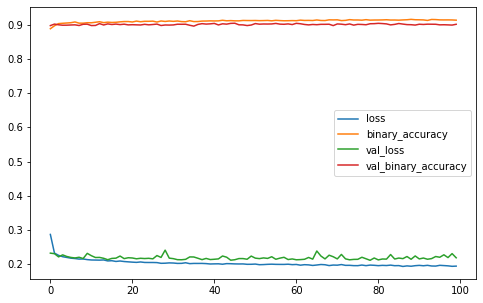

In [99]:
import keras
from matplotlib import pyplot as plt
pd.DataFrame(story.history).plot(figsize=(8,5))
plt.show()


In [ ]:
# Daprés la figure ci-dessus: on peut dire que notre modele est valide. car la fonction de validation
# et la fonction d'entrainement sont stable presque sur la meme précision 0.90
# Idem pour la fonction des couts (loss) et val loss.
# on peut deduire que notre modele est bon. 

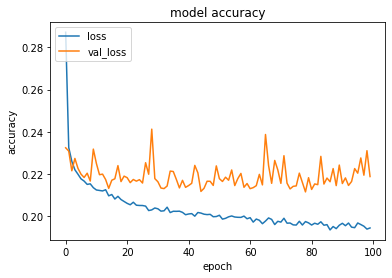

In [102]:
#Un zoom sur loss et val_loss
plt.plot(story.history['loss'])
plt.plot(story.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

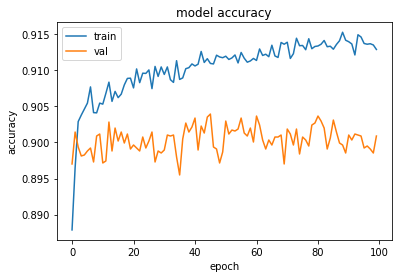

In [101]:
#Un zoom sur binary accurency
plt.plot(story.history['binary_accuracy'])
plt.plot(story.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Comparaison

La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = logreg.predict(x_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
# notre modele n'est pas mal par rapport à la regression logistique


#Partie(3):

##7)Mise en production du modele :Deploiement du modele avec Flask

In [ ]:
# from math import expm1
# import joblib
# import pandas as pd
# from flask import Flask, jsonify, request
# from tensorflow import keras

# app = Flask(__name__)
# model = keras.models.load_model("assets/saved_model.pb")
# #transformer = joblib.load("assets/data_transformer.joblib")

# @app.route("/", methods=["POST"])
# def index():
#     data = request.json
#     df = pd.DataFrame(data, index=[0])
#     #prediction = model.predict(transformer.transform(df))
#     predicted_price = expm1(prediction.flatten()[0])
#     return jsonify({"price": str(predicted_Y)})

#Creation d'une image Docker
##Creer un fichier .yml contenant la configuration docker


In [ ]:
# L'api sera fourni le jour de la soutenance.

In [ ]:
'''
entrypoint: "gunicorn -b :$PORT app:app --timeout 500"
runtime: python
env: flex
service: nyc-y-prediction
runtime_config:
  python_version: 3.7
instance_class: B1
manual_scaling:
  instances: 1
liveness_check:
  path: "/liveness_check"

'''


In [ ]:
# Ressource : https://towardsdatascience.com/build-and-run-a-docker-container-for-your-machine-learning-model-60209c2d7a7f

#Perspectives

1)Le modele classifier avec 4 couches de keras est rebuste pour notre problematique malgrés la mauvaise correlation entre les variables. 


2) On peut dire que cette approche peuve répondre à notre problématique de classification,. Biensur, en prennant toutes information prédictives des variables sur lesquelles nous avons entrainé notre modele.

3)Flask est un bon outil pour la mise en production des modeles deepLeraning.

4) Notre modele n'est pas mal par rapport à la regression logistique
